# Code for analyses in Supplementary

In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

## Mediator

### Load results

In [2]:
# Load pickle data in mediator folder

with open(f'data/results_uniform_priors.pkl', 'rb') as f:
    uniform_priors = pickle.load(f)
with open(f'data/results_wide_normal_priors.pkl', 'rb') as f:
    wide_norm_priors = pickle.load(f)

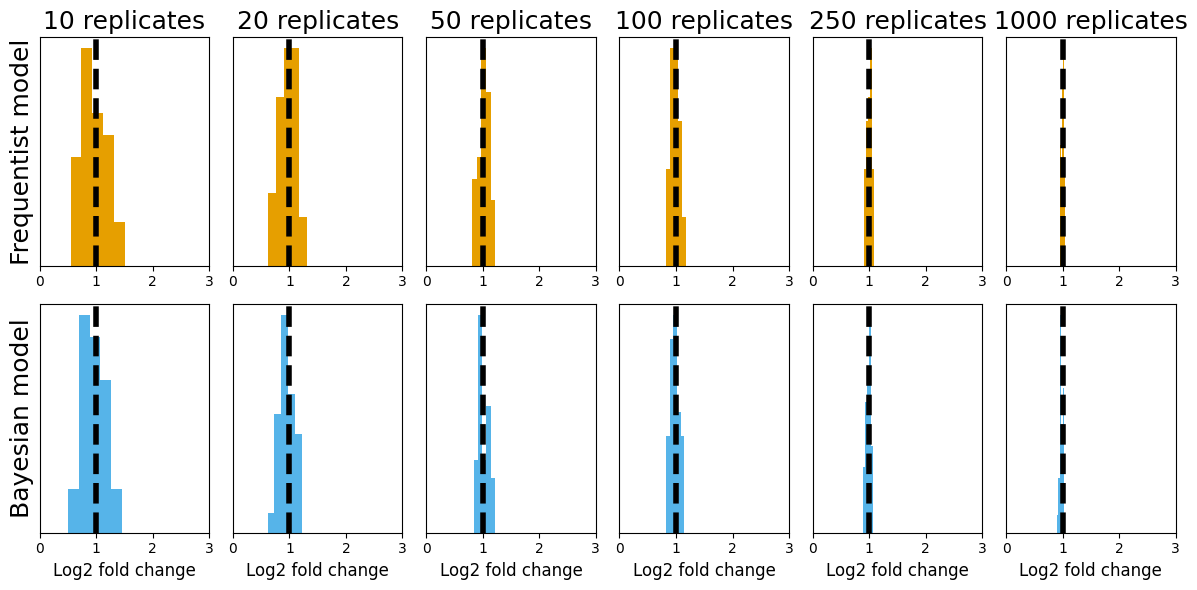

In [4]:
fig, ax = plt.subplots(2,6,figsize=(12,6))

for i in range(6):

    key = [10, 20, 50, 100, 250, 1000][i]

    data = wide_norm_priors['Mediator'][
        wide_norm_priors['Mediator']["Replicates"] == key].reset_index(drop=True)

    ax[0, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[0, i].hist(data["Eliator"], 
                  bins=5, color="#E69F00")
    ax[0, i].set_title(f"{key} replicates", size=18)
    ax[0, 0].set_ylabel("Frequentist model", size=18)

    ax[1, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[1, i].hist(data["MScausality"], 
                  bins=5, color="#56B4E9")
    ax[1, 0].set_ylabel("Bayesian model", size=18)
    ax[1, i].set_xlabel("Log2 fold change", size=12)

plt.setp(ax, xlim=(-0,3), yticks=[])
# plt.setp(ax, xlim=(-1,2.5))
plt.tight_layout()


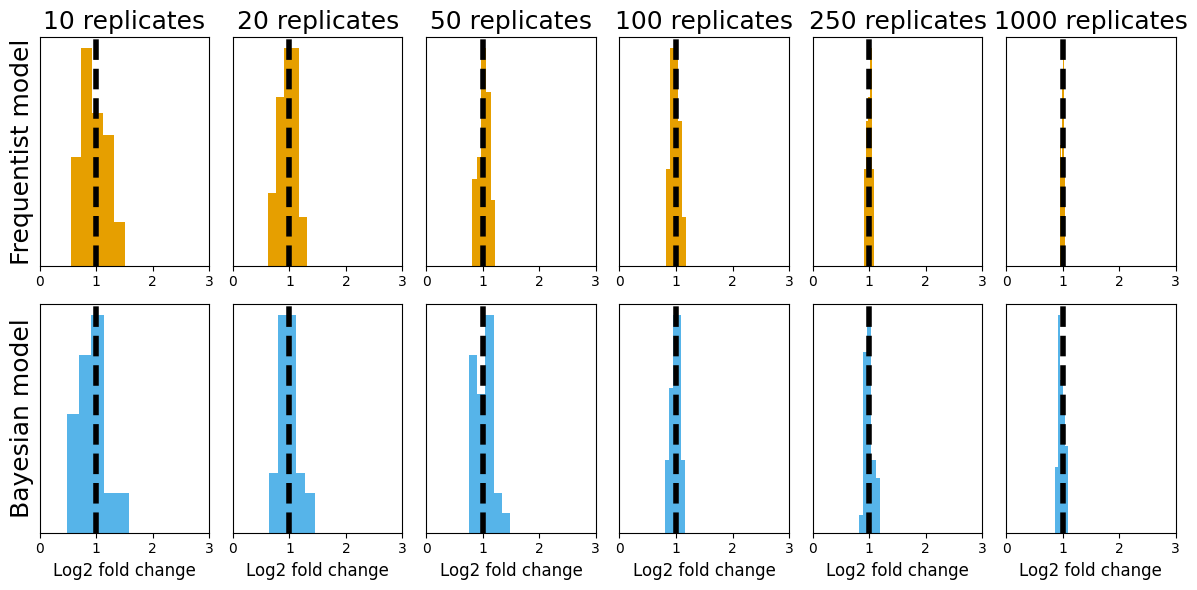

In [5]:
fig, ax = plt.subplots(2,6,figsize=(12,6))

for i in range(6):

    key = [10, 20, 50, 100, 250, 1000][i]

    data = uniform_priors['Mediator'][
        uniform_priors['Mediator']["Replicates"] == key].reset_index(drop=True)

    ax[0, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[0, i].hist(data["Eliator"], 
                  bins=5, color="#E69F00")
    ax[0, i].set_title(f"{key} replicates", size=18)
    ax[0, 0].set_ylabel("Frequentist model", size=18)

    ax[1, i].axvline(data.loc[0, "Ground_truth"], 
                     color="black", linestyle="dashed", lw=4)
    ax[1, i].hist(data["MScausality"], 
                  bins=5, color="#56B4E9")
    ax[1, 0].set_ylabel("Bayesian model", size=18)
    ax[1, i].set_xlabel("Log2 fold change", size=12)

plt.setp(ax, xlim=(-0,3), yticks=[])
# plt.setp(ax, xlim=(-1,2.5))
plt.tight_layout()
